# data importing and preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../data/House_Price.csv') # read data
data.head()  # view data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [3]:
data.shape # print number of rows and columns 

(506, 19)

In [4]:
data.describe() # print statistics of our data

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


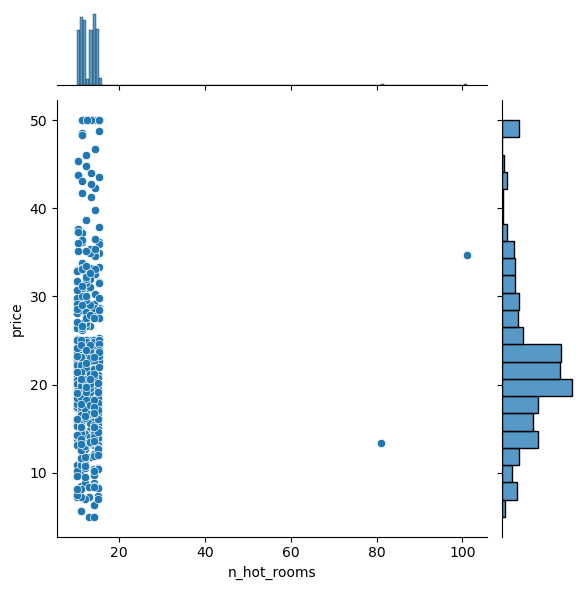

In [5]:
sns.jointplot( x='n_hot_rooms', y='price', data=data ) 
# observation : have some values unexpected that may be affect results 

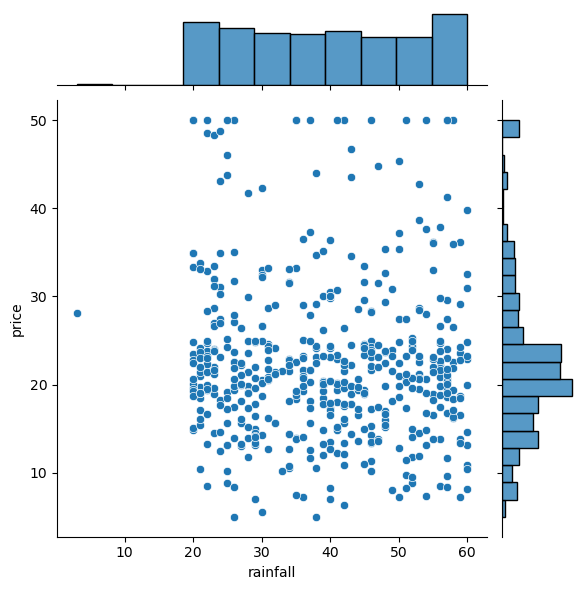

In [6]:
sns.jointplot( x='rainfall', y='price', data=data )
# observation : have some values unexpected that may be affect results 

<AxesSubplot:xlabel='airport', ylabel='count'>

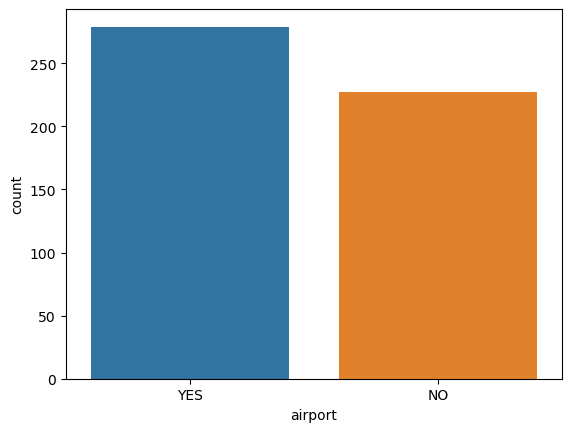

In [7]:
sns.countplot(x='airport',data=data)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

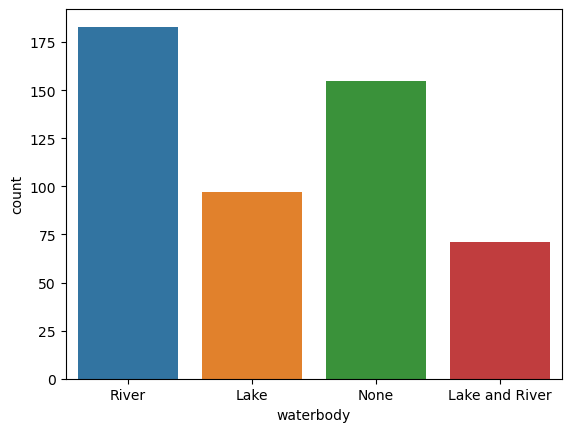

In [8]:
sns.countplot(x='waterbody',data=data)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

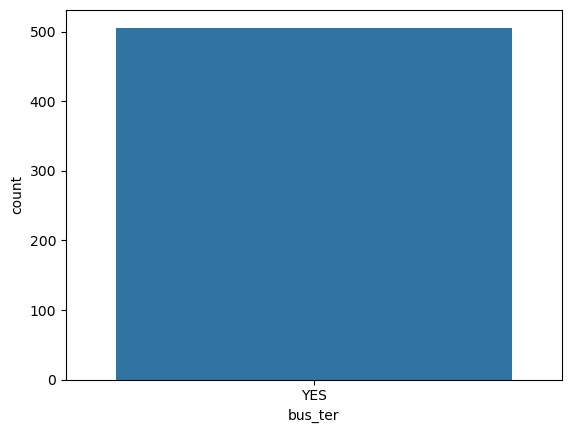

In [9]:
sns.countplot(x='bus_ter',data=data)
# observation : all values of this column = yes !!

## Outlier Treatment


In [ ]:
upper_value = np.percentile(data.n_hot_rooms,[99])[0] # select 99% of this column
data[(data.n_hot_rooms>upper_value)] # view the values grather then upper_value
data.n_hot_rooms[(data.n_hot_rooms>3*upper_value)]=3*upper_value # modify the values greater then 3 * upper_value 

In [ ]:
lower_value = np.percentile(data.rainfall,[1])[0] # select 1% of this column
data.rainfall[(data.rainfall<0.3*lower_value)]=0.3*lower_value # modify the values less then 0.1 * lower_value

In [12]:
data.info() # view infos of our data -> missing values for column n_hos_beds

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [13]:
data.n_hos_beds = data.n_hos_beds.fillna(data.n_hos_beds.mean()) # replace missing values with mean value

In [14]:
data['avg_dist'] = (data.dist1+data.dist2+data.dist3+data.dist4)/4 # replace columns dist1,dist2,dist3,dist4 by one column (average)
# delete unuseful columns
del data['dist1']
del data['dist2']
del data['dist3']
del data['dist4']
del data['bus_ter'] # the same value of all data

In [15]:
data = pd.get_dummies(data) # this function converts categorical data into dummy or indicator variables.

In [16]:
del data['airport_NO']
del data['waterbody_None']

In [17]:
data.corr()
del data['parks']